<a href="https://colab.research.google.com/github/JMindpalace/Machine_Learning/blob/main/Example/001.%20%EC%99%80%EC%9D%B8%20%EB%93%B1%EA%B8%89%26%EC%84%B1%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의
> 높은 품질의 와인은 어떤 화학적 특징을 가지고 있는가?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

# Read Data-set

In [ ]:
uploaded = files.upload()
df_red = pd.read_csv('winequality-red.csv', sep=';')

Saving winequality-red.csv to winequality-red.csv


In [ ]:
uploaded = files.upload()
df_white = pd.read_csv('winequality-white.csv', sep=';')

Saving winequality-white.csv to winequality-white.csv


# Columns
`Independent Variables:`
- fixed_acidity (결합산) : 와인의 산도를 제어한다.
- volatile_acidity (휘발산) : 와인의 향과 연관된다. 
- citric_acid (구연산) : 와인의 산도를 높이기 위해 사용되며, 신선함을 올려주는 역할을 한다. 
- residual_sugar (잔여 설탕) : 와인의 단맛을 올려준다.
- chlorides (염화나트륨) : 농도에 따라 와인에 짠맛을 주며, 신맛을 좌우한다. 
- free_sulfur_dioxide (유리 아황산) : 이스트 발효의 부산물이다. 항산화제로 산화 방지, 살균 작용, 갈변 방지 등을 한다. 
- total_sulfur_dioxide (총 아황산) : 와인을 오래 보관하는 역할이며, 향과 연관된다.  
- density (밀도) : 바디의 높고 낮음을 표현하는 와인의 무게감을 의미한다. 
- pH (산성도) : 와인의 신맛의 정도를 나타낸다. 
- sulphates (황산염) : 와인의 향을 보존시킨다. 
- alcohol (알코올) : 와인의 바디감에 영향을 미친다. 단맛과 산성의 균형을 유지하도록 돕는다. 

`Dependent Variable:`
- quality : 와인 등급으로 0~10 사이의 값(정수)을 갖는다. 

In [ ]:
print(df_red.shape)
print(df_white.shape)

assert df_red.shape == (1599, 12)
assert df_white.shape == (4898, 12)

(1599, 12)
(4898, 12)


In [ ]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur-dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 데이터 전처리

## 1. 중복 데이터 처리

In [ ]:
print( df_red.duplicated().sum() )
df_red = df_red.drop_duplicates()
df_red = df_red.reset_index(drop=True)

assert df_red.shape == (1359, 12)

print( df_white.duplicated().sum() )
df_white = df_white.drop_duplicates()
df_white = df_white.reset_index(drop=True)

assert df_white.shape == (3961, 12)

0
0


## 2. EDA

In [ ]:
df_red['color'] = np.repeat('red', len(df_red))
df_white['color'] = np.repeat('white', len(df_white))
set(df_red.columns) == set(df_white.columns)

False

In [ ]:
df_red.rename(columns = {'total_sulfur-dioxide' : 'total_sulfur_dioxide'}, inplace=True)
set(df_red.columns) == set(df_white.columns)

True

In [ ]:
df = df_white.append(df_red, ignore_index = True)
assert df.shape == (5320, 13)
df.to_csv('winequality_edited.csv', index=False)
wine_df = pd.read_csv('winequality_edited.csv')

In [ ]:
wine_df.groupby('color').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
white,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835


In [ ]:
wine_df.groupby('color')['quality'].mean()

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

In [ ]:
wine_df.groupby('color', as_index=False)['quality'].mean()

,color,quality
0,red,5.623252
1,white,5.854835


In [ ]:
# pH = White < Red
wine_df.groupby(['quality', 'color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.185425
4,5,red,3.300815
5,5,white,3.171779
6,6,red,3.318000
7,6,white,3.196029
8,7,red,3.290060
9,7,white,3.228462


In [ ]:
wine_df.pH.describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [ ]:
bins = [2.72, 3.11, 3.21, 3.33, 4.01]
labels = ['Low', 'Medium', 'Moderately High', 'High']
wine_df['ph_levels'] = pd.cut(x=wine_df['pH'], bins=bins, labels=labels)

# pH가 높다면 높은 등급의 품질, 하지만 Moder-High가 High보다 높기에 조화가 중요함
wine_df.groupby('ph_levels', as_index=False)['quality'].mean()

,ph_levels,quality
0,Low,5.728024
1,Medium,5.766917
2,Moderately High,5.852624
3,High,5.834254


5.78316032295271


5.807649871276205

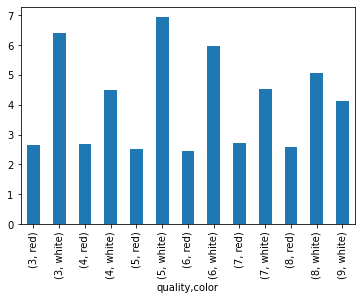

In [ ]:
# 잔류설탕 - White >> Red
group_residual_sugar = wine_df.groupby(['quality', 'color'])['residual_sugar'].mean()
group_residual_sugar.plot(kind='bar');

# 잔류설탕 - Query로 확인하기
sugar_med = wine_df.residual_sugar.median()
low_sugar = wine_df.query('residual_sugar < @sugar_med')
high_sugar = wine_df.query('residual_sugar >= @sugar_med')

print( low_sugar.quality.mean() )
high_sugar.quality.mean()

quality
3    0.517000
4    0.462379
5    0.393970
6    0.315626
7    0.292342
8    0.302973
9    0.298000
Name: volatile_acidity, dtype: float64


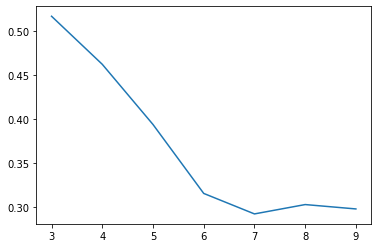

In [ ]:
# 아세트산 - 높은 등급은 아세트산이 낮음
group_volatile_acidity = wine_df['volatile_acidity'].groupby(wine_df['quality'])
print(group_volatile_acidity.mean())

plt.plot(group_volatile_acidity.mean());

quality
3    0.995744
4    0.994802
5    0.995734
6    0.994377
7    0.992838
8    0.992130
9    0.991460
Name: density, dtype: float64


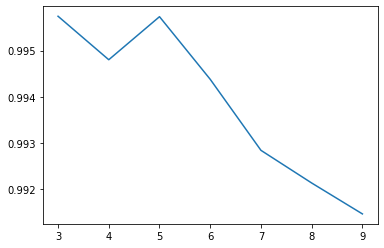

In [ ]:
# 물의 밀도 - 밀도가 낮을수록 높은 품질
group_density = wine_df['density'].groupby(wine_df['quality'])
print(group_density.mean())

plt.plot(group_density.mean());

In [ ]:
# 도수, 점성, 바디감 - 도수가 높을수록 점성이 높고, 바디감도 높아지는데, 높은 바디감은 높은 품질
light_body = wine_df.query("alcohol <= 12.5")
medium_body = wine_df.query("(alcohol > 12.5) and (alcohol < 13.5)")
full_body = wine_df.query("alcohol >= 13.5")

print('Mean quality value for wine with {} alcohol content : {:.2f}'.format('"low"', light_body.quality.mean()))
print('Mean quality value for wine with {} alcohol content : {:.2f}'.format('"medium"', medium_body.quality.mean()))
print('Mean quality value for wine with {} alcohol content : {:.2f}'.format('"high"', full_body.quality.mean()))

Mean quality value for wine with "low" alcohol content : 5.73
Mean quality value for wine with "medium" alcohol content : 6.65
Mean quality value for wine with "high" alcohol content : 6.62


# Business Insight

1. pH = pH가 높으면, 높은 품질(반드시적 관계는 아님)
2. 맛
   > 단맛: White > Red<br>
   > 떫은맛: 염화나트륨이 낮을수록 높은 품질
3. 향 = 낮은 휘발성산일수록 높은 품질
4. 바디감 = 바디감이 무거울수록 높은 품질